In [1]:
train.data <- read.csv(file.path("..", "data", "training_data.csv"))
test.data <- read.csv(file.path("..", "data", "test_data.csv"))

## Preparation of data

In [6]:
#set seed for reproduction
set.seed(100)

#searching for input variables with zero variance (without the varible Intensity)
x <- train.data[, -c(1,2,3)]
idx.zero.var <- apply(x, 2, var) == 0
x <- x[,!idx.zero.var]

#attache Intensity as factor
x$Intensity <- as.numeric(train.data$Intensity) -1 

In [8]:
set.seed(100)
len <- length(x[,1])
idx.train <- sample(1:len, 2*len/3)

train.x <- x[idx.train,]
train.y <- train.data$VALENCE.PLEASANTNESS[idx.train]


train <- train.x
train$VALENCE.PLEASANTNESS <- train.y

validation <- x[-idx.train,]
validation$VALENCE.PLEASANTNESS <- train.data$VALENCE.PLEASANTNESS[-idx.train]

## Forward Subsetselection (already defined: nvmax_best = 9)

In [11]:
set.seed(100)

library(tidymodels)
library(leaps)


reg.fit <- regsubsets(formula = VALENCE.PLEASANTNESS ~ -1. , x = train.x, y = train.y , method = "forward", nvmax = 20)

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
"2728  linear dependencies found"


Reordering variables and trying again:


## Prediction with the 9 selected variables + Plots of these variables vs. VALENCE.PLEASANTNESS

In [12]:
#We have seen by crossvalidation that the best prediction is obtained with 9 predictors
coefi <- coef(reg.fit, id = 9)
names <-names(coefi)
test.mat <- model.matrix(VALENCE.PLEASANTNESS ~ . ,data=validation)
reg.prediction <- test.mat[,names]%*%coefi
reg.MSE <- mean((reg.prediction - validation$VALENCE.PLEASANTNESS)^2)
cat("The linear fit from the forwardselction with 9 predictors has a MSE of ", reg.MSE, '\n')
cat("The predictors are:", names)

The linear fit from the forwardselction with 9 predictors has a MSE of  460.0224 
The predictors are: (Intercept) MATS7i GATS5m Eig08_EA.ri. Mor13i Mor27i nRCOOR C.026 H.052 F01.C.S.

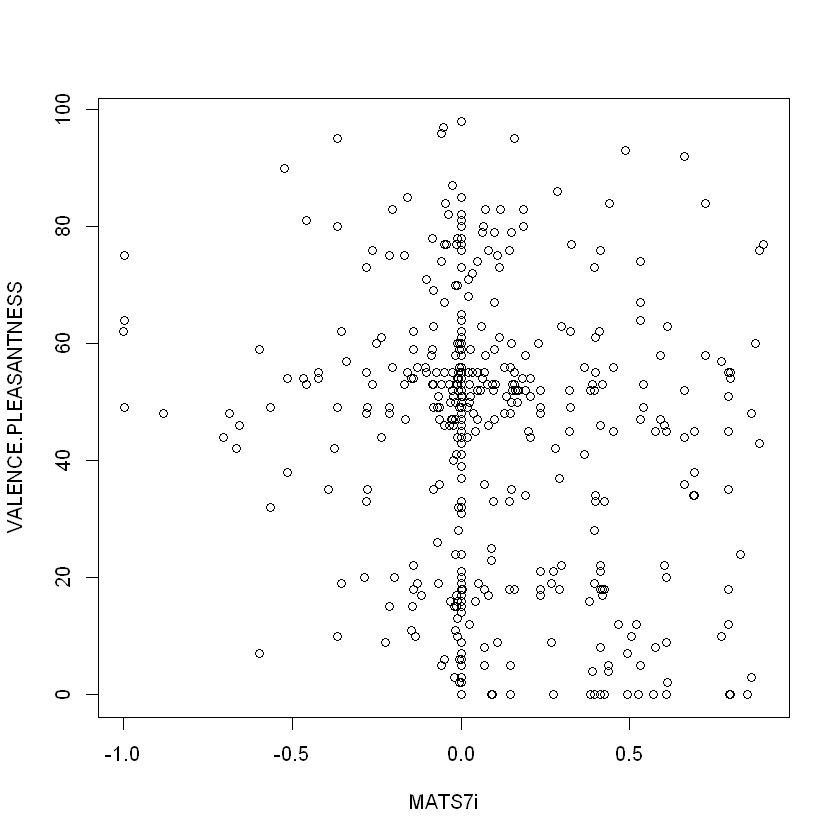

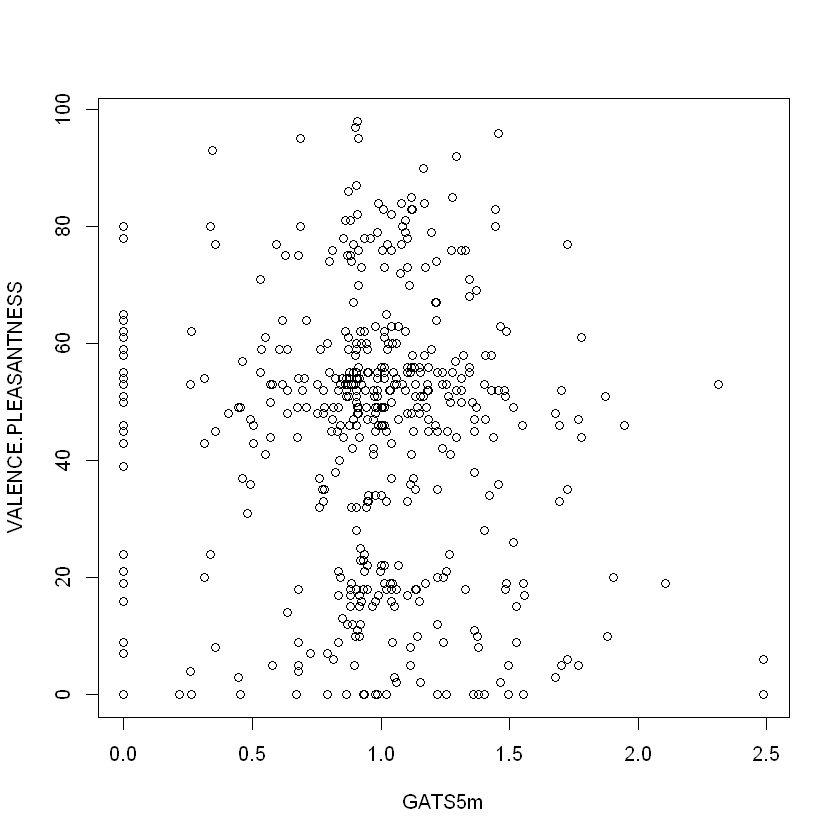

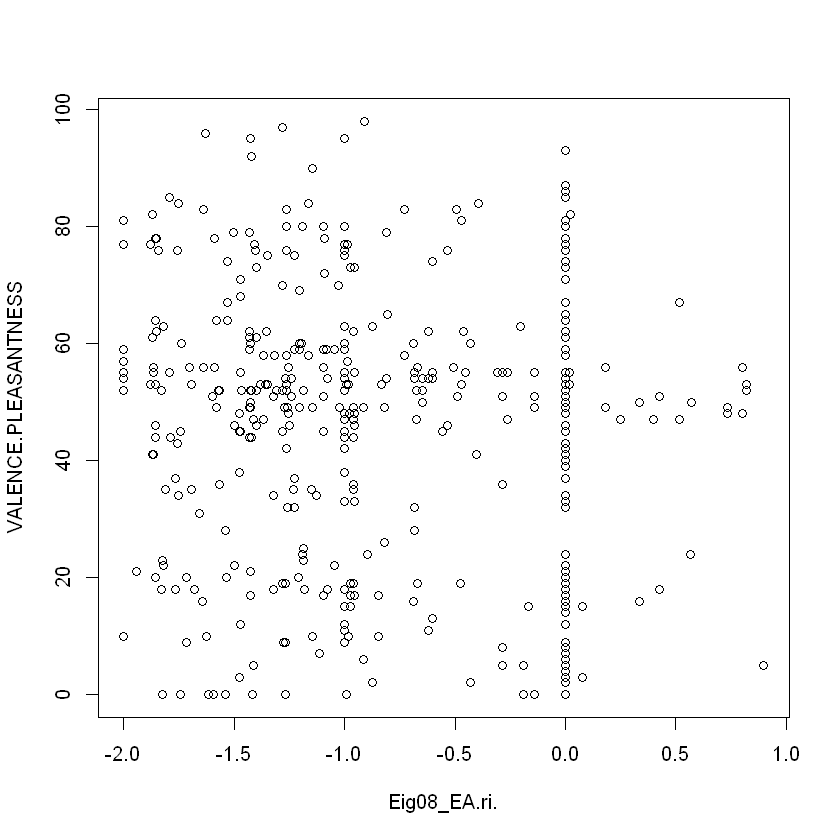

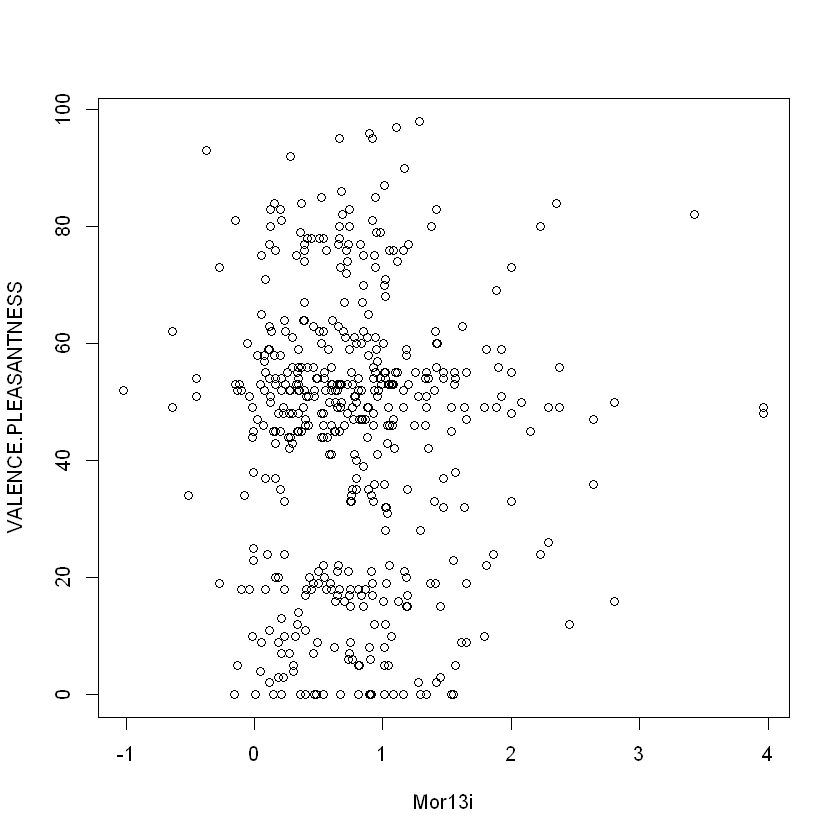

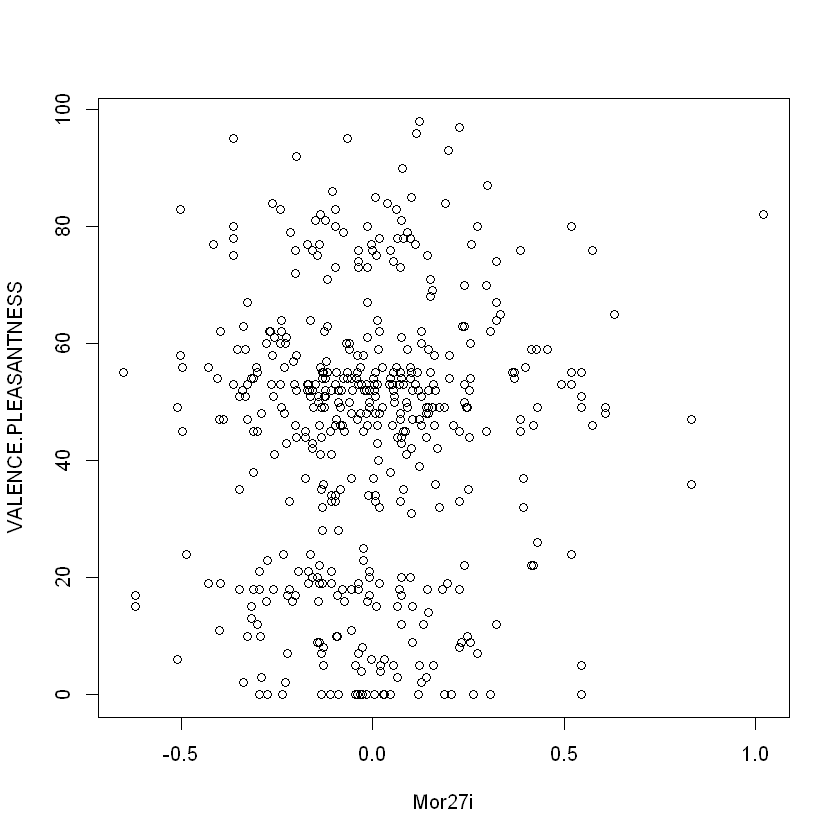

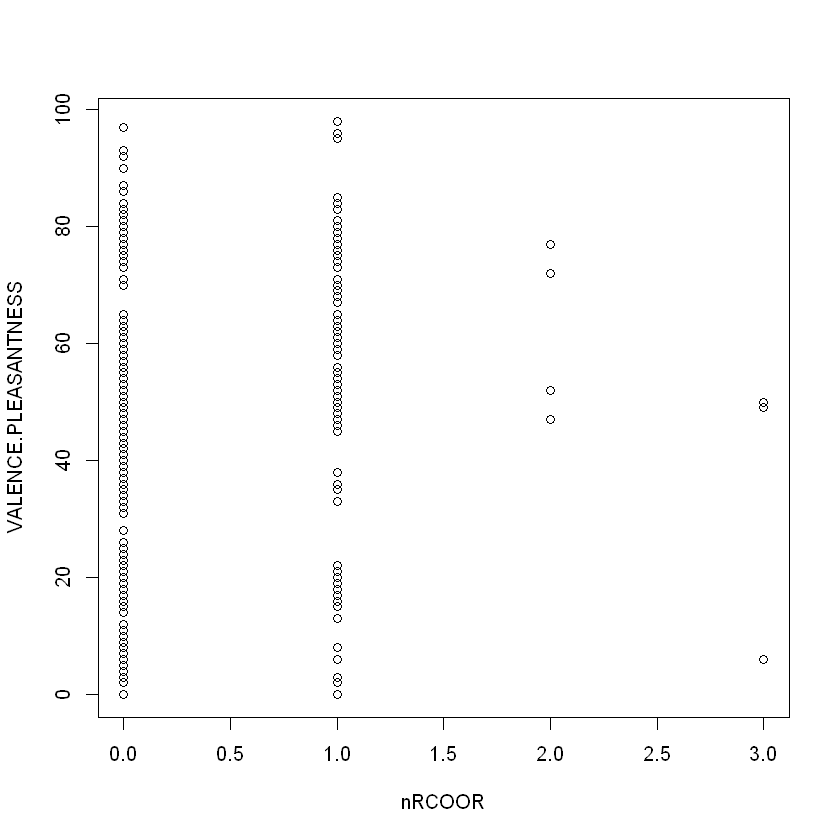

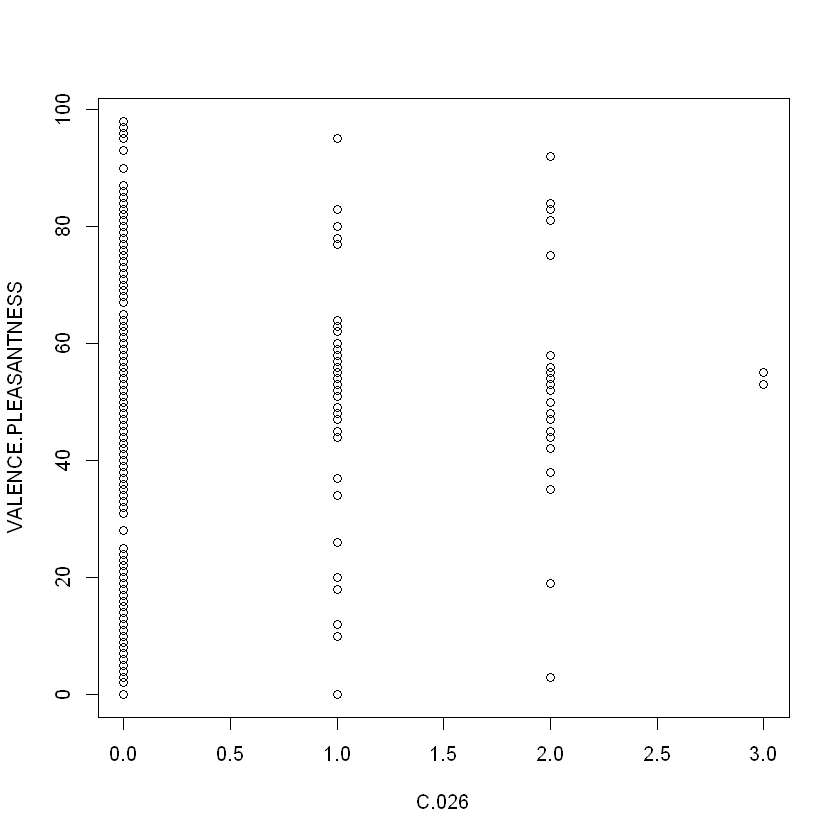

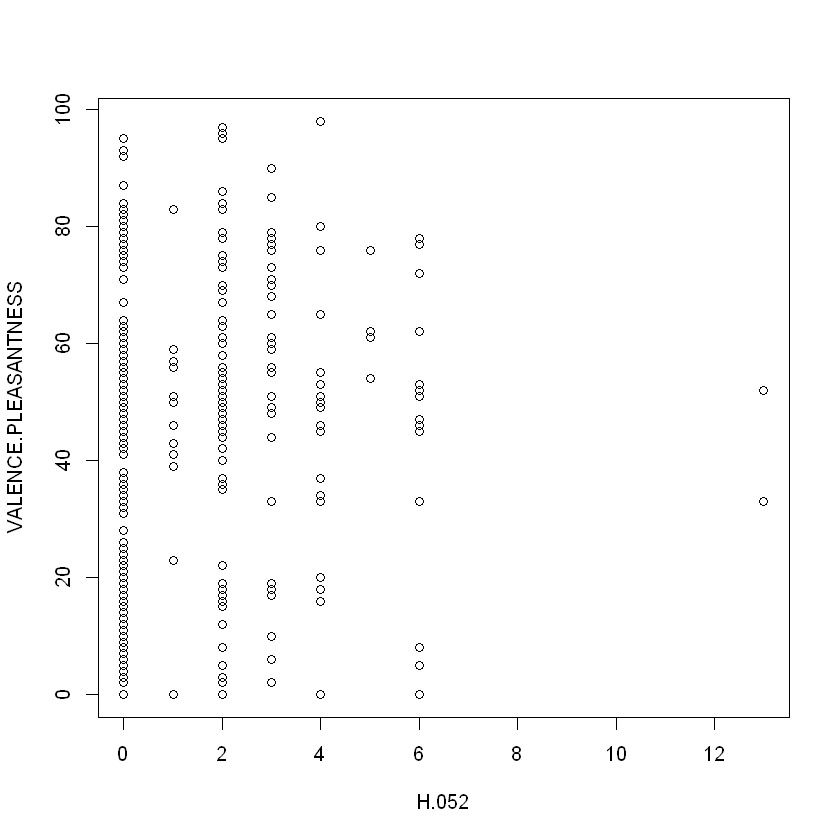

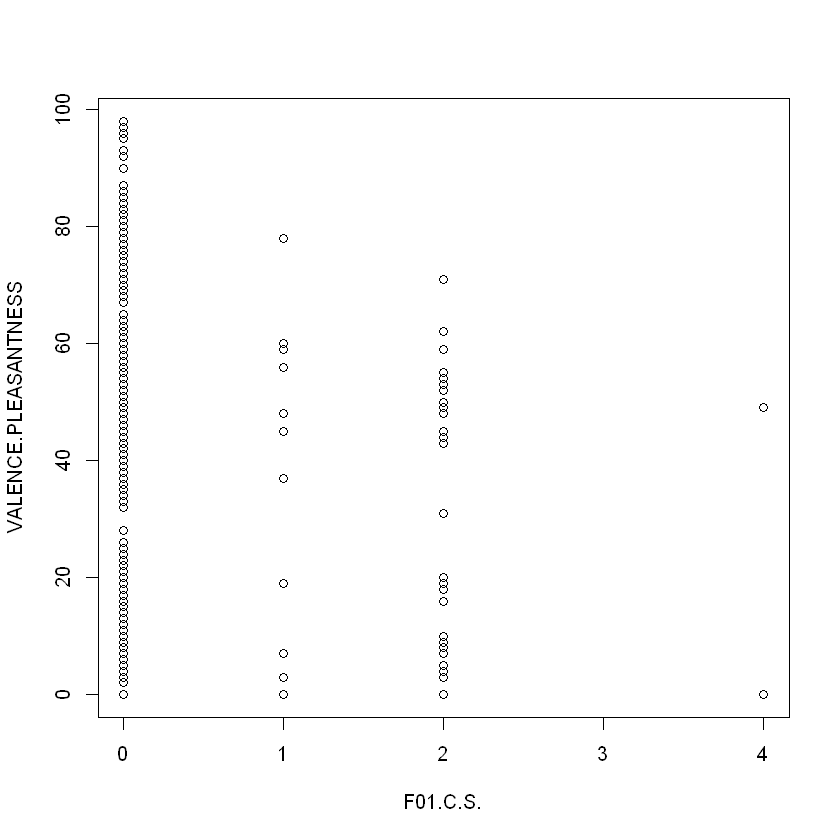

In [437]:
creat.plots <- function(data, x.f, y.f = 'VALENCE.PLEASANTNESS'){
    len <- length(x.f)
    for (i in 1:len){
        formula <- as.formula(paste(y.f, paste(x.f[i], collapse=" + "), sep=" ~ "))
        plot(formula, data)
    }
}

creat.plots(data.train, names[-1])

## Crossvalidation to find best poly(predictor, id)

In [14]:
creat.formula <- function(x.f, degrees, y.f = 'VALENCE.PLEASANTNESS'){
    len <- length(degrees)
    y.f = y.f

    x.f <- sapply(1:len, function(i){
        paste("poly(", x.f[i], ",", degrees[i], ")")
    })
    as.formula(paste(y.f, paste(x.f, collapse = " + "), sep = " ~ "))
    
}

In [457]:
library(tidymodels)
library(leaps)

set.seed(100)


fit_and_evaluate <- function(fold) {
    names <-names
    MSEs <- c()
    
    
    for (i in 1:n.deg){ 
        formula <- creat.formula(names[-1], degrees[i,])
        #regression
        fit <- lm(formula, analysis(fold))
        prediction <- predict(fit, assessment(fold))
        MSE <- mean((prediction - assessment(fold)$VALENCE.PLEASANTNESS)^2)
        MSEs <- append(MSEs, MSE)
    }
    
    MSEs
}

#data
full.data <- x
full.data$VALENCE.PLEASANTNESS <- train.data$VALENCE.PLEASANTNESS
validation.data <- vfold_cv(full.data, v = 5)           

d <- c(1,2,3)
degrees <- expand.grid(d,d,d,d,d,d,d,d,d) 
n.deg <- length(degrees[,1])

MSEs <- sapply(validation.data$splits, fit_and_evaluate)

In [458]:
mean.errors <- rowMeans(MSEs)

In [459]:
min <- which.min(mean.errors)
max <- which.max(mean.errors)

mean.errors[min]
degrees[min,]
mean.errors[max]
degrees[max,]

[1] 455.2059

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2326,1,2,1,3,2,1,1,2,1


[1] 479.285

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19467,3,3,3,1,1,3,3,3,3


## Submission

In [1]:
train.data <- read.csv(file.path("..", "data", "training_data.csv"))
test.data <- read.csv(file.path("..", "data", "test_data.csv"))

In [2]:
#set seed for reproduction
set.seed(100)

#searching for input variables with zero variance (without the varible Intensity)
x <- train.data[, -c(1,2,3)]
idx.zero.var <- apply(x, 2, var) == 0
x <- x[,!idx.zero.var]

#attache Intensity as factor
x$Intensity <- as.numeric(train.data$Intensity) -1 

In [3]:
set.seed(100)
len <- length(x[,1])
idx.train <- sample(1:len, 2*len/3)

train.x <- x[idx.train,]
train.y <- train.data$VALENCE.PLEASANTNESS[idx.train]


train <- train.x
train$VALENCE.PLEASANTNESS <- train.y

validation <- x[-idx.train,]
validation$VALENCE.PLEASANTNESS <- train.data$VALENCE.PLEASANTNESS[-idx.train]

In [8]:
library(tidymodels)
library(leaps)


reg.fit <- regsubsets(formula = VALENCE.PLEASANTNESS ~ -1. , x = train.x, y = train.y , method = "forward", nvmax = 20)
coefi <- coef(reg.fit, id = 9)
names <-names(coefi)

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
"2728  linear dependencies found"


Reordering variables and trying again:


In [9]:
creat.formula <- function(x.f, degrees, y.f = 'VALENCE.PLEASANTNESS'){
    len <- length(degrees)
    y.f = y.f

    x.f <- sapply(1:len, function(i){
        paste("poly(", x.f[i], ",", degrees[i], ")")
    })
    as.formula(paste(y.f, paste(x.f, collapse = " + "), sep = " ~ "))
    
}

In [10]:
d <- c(1,2,3)
degrees <- expand.grid(d,d,d,d,d,d,d,d,d) 
formula <- creat.formula(names[-1], degrees[2326,])

In [ ]:
submission.fit <- lm(formula, train.data)
prediction <- predict(submission.fit, test.data)

In [19]:
#Creation of csv submission-file
submission <- data.frame(Id = 1:68, VALENCE.PLEASANTNESS = prediction)
write.csv(submission, file = "../Submissions/9_predictors.csv", row.names = FALSE)